In [1]:
import h5py
import pylab as pl
import numpy as np
import scipy.stats as sp
import networkx

In [2]:
# let see a couple (a large couple, like 3 or more) of snapshot
sim = h5py.File('/data/cielo/simulations/LG1/LG1.hdf5', 'r')
snap = sim['SnapNumber_128']

In [3]:
stars =  snap['PartType4']
gas = snap['PartType0']

In [4]:
stars.keys()

<KeysViewHDF5 ['Abundances', 'BindingEnergy', 'Circularity', 'Coordinates', 'GroupNumber', 'Masses', 'ParticleIDs', 'Potential', 'SpecificAngularMomentum', 'StellarFormationTime', 'SubFindNumber', 'SubGroupNumber', 'Velocities']>

In [6]:
stars['ParticleIDs'].attrs.keys()

<KeysViewHDF5 ['description']>

In [7]:
stars['ParticleIDs'].attrs['description']

'The unique particle ID'

In [8]:
Id = stars['ParticleIDs'][0]
Id

2149303829

In [15]:
Plist = []
for i in range(128, 38, -1):
    pid = sim['SnapNumber_{}/PartType4/ParticleIDs'.format(i)][()]
    j = np.where(pid == Id)
    if j[0]>0:
        Pos = sim['SnapNumber_{}/PartType4/Coordinates'.format(i)][j[0][0]]
        Plist.append(Pos)

Plist = np.array(Plist)

<ipython-input-15-1cb43a4f68b7>:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if j[0]>0:


Text(0, 0.5, 'z')

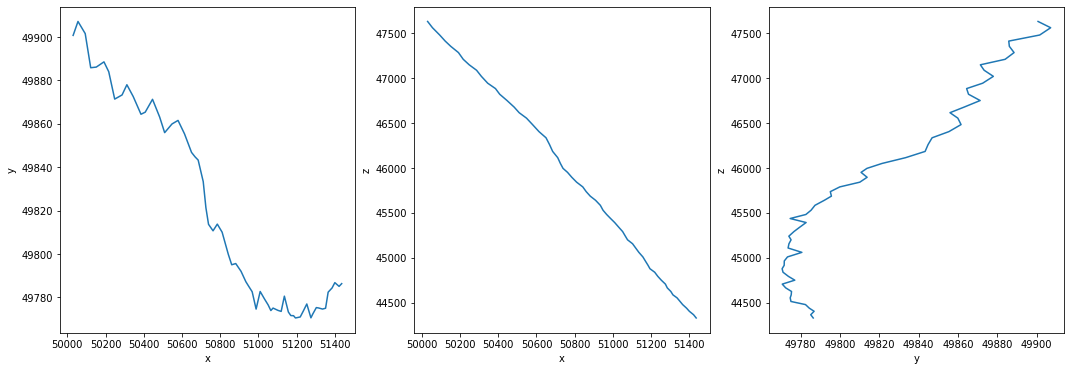

In [17]:
pl.figure(figsize=(18,6))

x, y, z = Plist[:,0], Plist[:,1], Plist[:,2]

pl.subplot(1,3,1)
pl.plot(x, y)

pl.xlabel('x')
pl.ylabel('y')

pl.subplot(1,3,2)
pl.plot(x, z)

pl.xlabel('x')
pl.ylabel('z')

pl.subplot(1,3,3)
pl.plot(y, z)

pl.xlabel('y')
pl.ylabel('z')

In [18]:
# and gas now, maybe is a little less bumpy
Id = gas['ParticleIDs'][0]
Id

2150155763

In [19]:
PlistG = []
for i in range(128, 38, -1):
    pid = sim['SnapNumber_{}/PartType0/ParticleIDs'.format(i)][()]
    j = np.where(pid == Id)
    if j[0]>0:
        Pos = sim['SnapNumber_{}/PartType0/Coordinates'.format(i)][j[0][0]]
        PlistG.append(Pos)

PlistG = np.array(PlistG)

<ipython-input-19-9075ae6a06bf>:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if j[0]>0:


Text(0, 0.5, 'z')

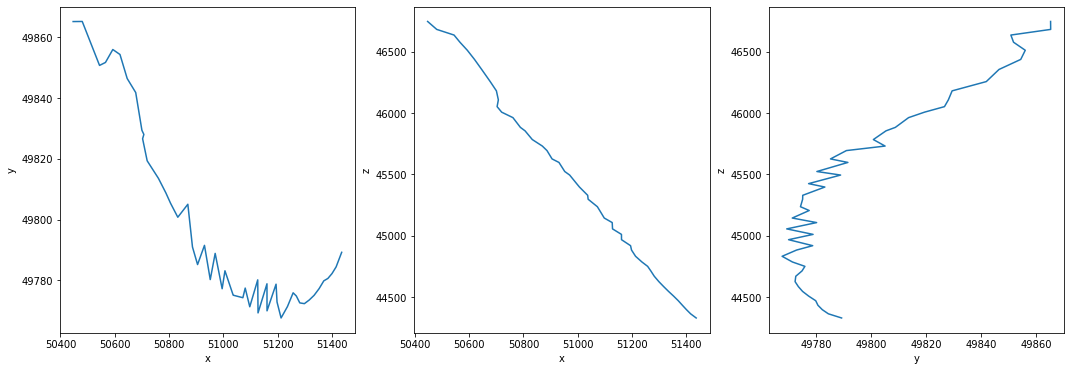

In [22]:
pl.figure(figsize=(18,6))

xG, yG, zG = PlistG[:,0], PlistG[:,1], PlistG[:,2]

pl.subplot(1,3,1)
pl.plot(xG, yG)

pl.xlabel('x')
pl.ylabel('y')

pl.subplot(1,3,2)
pl.plot(xG, zG)

pl.xlabel('x')
pl.ylabel('z')

pl.subplot(1,3,3)
pl.plot(yG, zG)

pl.xlabel('y')
pl.ylabel('z')